In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lokeshsaipureddi/drishtigs-retina-dataset-for-onh-segmentation")

print("Path to dataset files:", path)

100%|██████████| 341M/341M [00:05<00:00, 70.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lokeshsaipureddi/drishtigs-retina-dataset-for-onh-segmentation/versions/1


In [2]:
print("Dataset path:", path)

Dataset path: /root/.cache/kagglehub/datasets/lokeshsaipureddi/drishtigs-retina-dataset-for-onh-segmentation/versions/1


In [3]:
dataset_path = path
#print("Files and directories in dataset path:", os.listdir(dataset_path))

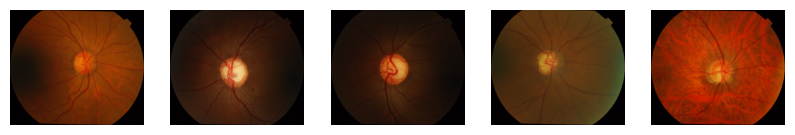

In [4]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the training images
dataset_path = os.path.join(path, 'Training-20211018T055246Z-001', 'Training', 'Images')

# Walk through the subdirectories and gather image paths
image_files = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image_files.append(os.path.join(root, file))

# Check if there are any images in the list
if len(image_files) == 0:
    print("No image files found in the specified dataset path. Please check the folder content.")
else:
    # Display a few images (e.g., first 5 images)
    plt.figure(figsize=(10, 10))
    num_images = min(5, len(image_files))  # Limit to available images
    for i in range(num_images):
        img = Image.open(image_files[i])
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()


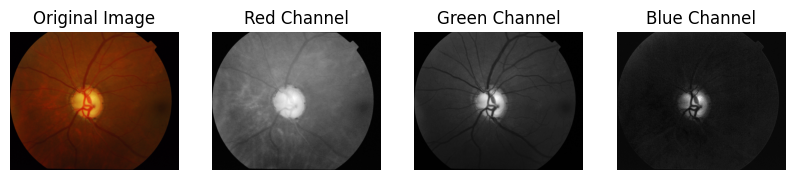

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

# Open an example image from the dataset
dataset_path = os.path.join(path, 'Training-20211018T055246Z-001', 'Training', 'Images', 'GLAUCOMA')
img_path = os.path.join(dataset_path, "drishtiGS_010.png")
img = Image.open(img_path)

# Split the image into RGB channels
r, g, b = img.split()

# Display the original image and its RGB channels
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

# Red Channel
plt.subplot(1, 4, 2)
plt.imshow(r, cmap='gray')
plt.title("Red Channel")
plt.axis('off')

# Green Channel
plt.subplot(1, 4, 3)
plt.imshow(g, cmap='gray')
plt.title("Green Channel")
plt.axis('off')

# Blue Channel
plt.subplot(1, 4, 4)
plt.imshow(b, cmap='gray')
plt.title("Blue Channel")
plt.axis('off')

plt.show()


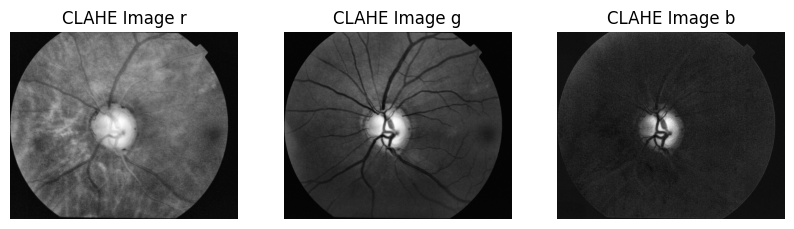

In [14]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open an example image from the dataset
dataset_path = os.path.join(path, 'Training-20211018T055246Z-001', 'Training', 'Images', 'GLAUCOMA')
img_path = os.path.join(dataset_path, "drishtiGS_010.png")
img = Image.open(img_path).convert("RGB")

# Convert the PIL image to an OpenCV image (NumPy array)
img_cv = np.array(img)

# Split the image into R, G, and B channels
r, g, b = cv2.split(img_cv)

# Create CLAHE object with desired parameters
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE to each channel separately
r_clahe = clahe.apply(r)
g_clahe = clahe.apply(g)
b_clahe = clahe.apply(b)

# Merge the CLAHE-adjusted channels back into an RGB image
img_clahe = cv2.merge((r_clahe, g_clahe, b_clahe))

# Display the original and CLAHE-applied images
plt.figure(figsize=(10, 5))

# CLAHE-applied to r
plt.subplot(1, 3, 1)
plt.imshow(r_clahe, cmap='gray')
plt.title("CLAHE Image r")
plt.axis('off')

# CLAHE-applied to g
plt.subplot(1, 3, 2)
plt.imshow(g_clahe, cmap='gray')
plt.title("CLAHE Image g")
plt.axis('off')

# CLAHE-applied to b
plt.subplot(1, 3, 3)
plt.imshow(b_clahe, cmap='gray')
plt.title("CLAHE Image b")
plt.axis('off')

plt.show()


In [15]:
# Calculate mean and standard deviation for each CLAHE-enhanced channel
#mean_blue, std_blue = cv2.meanStdDev(b_clahe)
mean_green, std_green = cv2.meanStdDev(g_clahe)
mean_red, std_red = cv2.meanStdDev(r_clahe)

# Display results
#print(f"CLAHE Blue Channel - Mean: {mean_blue[0][0]}, StdDev: {std_blue[0][0]}")
print(f"CLAHE Green Channel - Mean: {mean_green[0][0]}, StdDev: {std_green[0][0]}")
print(f"CLAHE Red Channel - Mean: {mean_red[0][0]}, StdDev: {std_red[0][0]}")

CLAHE Green Channel - Mean: 47.80641732136873, StdDev: 31.2252819388371
CLAHE Red Channel - Mean: 87.53612731982616, StdDev: 45.02883722428862


Load the image

Image found at: /root/.cache/kagglehub/datasets/lokeshsaipureddi/drishtigs-retina-dataset-for-onh-segmentation/versions/1/Training-20211018T055246Z-001/Training/Images/GLAUCOMA/drishtiGS_010.png


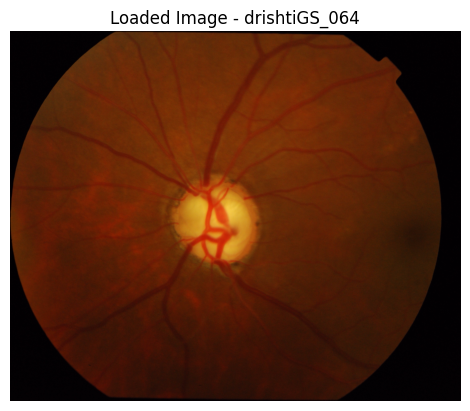

In [16]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define the root path to the dataset
dataset_path = os.path.join(path, 'Training-20211018T055246Z-001', 'Training', 'Images', 'GLAUCOMA')
img_path = os.path.join(dataset_path, "drishtiGS_010.png")

# Check if the file exists
if not os.path.exists(img_path):
    print("Image file not found:", img_path)
else:
    print("Image found at:", img_path)

    # Load the image
    img = Image.open(img_path).convert("RGB")  # Ensure it's RGB format
    img_np = np.array(img)  # Convert to NumPy array

    # Display the image
    plt.imshow(img_np)
    plt.title("Loaded Image - drishtiGS_064")
    plt.axis("off")
    plt.show()


Extract disc cup with thresholds

T1: -95.38186468741215
T2: 130.08717421593764


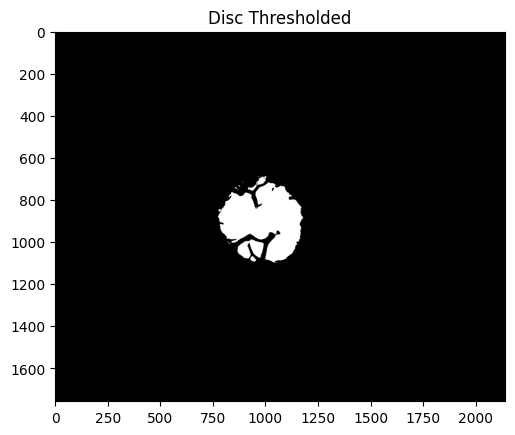

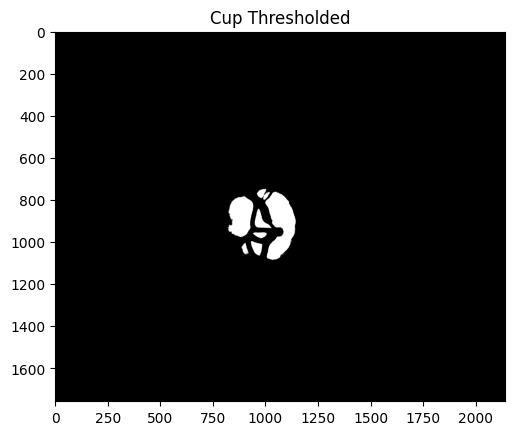

In [23]:
import cv2
import numpy as np
from PIL import Image

def calculate_thresholds(image, gaussian_window_size=5):

    # Convert the PIL image to an OpenCV image (NumPy array)
    img_np = np.array(img)

    if img_np.ndim == 2:  # Grayscale image
        image_for_opencv = img_np
    else:  # Color image (e.g., RGB)
        image_for_opencv = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)

    # Apply Gaussian Blur
    gaussian_blur = cv2.GaussianBlur(image_for_opencv, (gaussian_window_size, gaussian_window_size), 0)

    # Convert blurred image to grayscale
    gray_gaussian = cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2GRAY)

    # Calculate the necessary statistical measures
    m = gaussian_window_size
    sigma_G = np.std(gray_gaussian)
    sigma_RI = np.std(img_np[:, :, 0])  # Red channel
    sigma_GI = np.std(img_np[:, :, 1])  # Green channel
    mu_GI = np.mean(img_np[:, :, 1])   # Green channel mean

    # Calculate T1 and T2
    T1 = (0.5 * m) - (2 * sigma_G) - sigma_RI
    T2 = (0.5 * m) + (2 * sigma_G) + (2 * sigma_GI) + mu_GI

    return T1, T2

def extract_disc_cup_with_thresholds(img_path):

    # Convert image to grayscale (NumPy array for OpenCV)
    gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)

    # Calculate adaptive thresholds for disc and cup
    T1, T2 = calculate_thresholds(img_path)

    print("T1:", T1)
    print("T2:", T2)

    # Apply thresholding based on T1 for disc and T2 for cup
    _, thresh_disc = cv2.threshold(gray, abs(T1), 255, cv2.THRESH_BINARY)
    _, thresh_cup = cv2.threshold(gray, T2, 255, cv2.THRESH_BINARY)

    return thresh_disc, thresh_cup

thresh_disc, thresh_cup = extract_disc_cup_with_thresholds(img_path)

# Display the thresholded images
plt.imshow(thresh_disc, cmap='gray')
plt.title('Disc Thresholded')
plt.show()

plt.imshow(thresh_cup, cmap='gray')
plt.title('Cup Thresholded')
plt.show()

Morphology

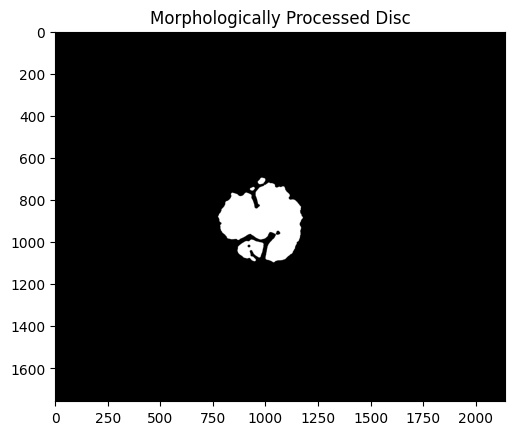

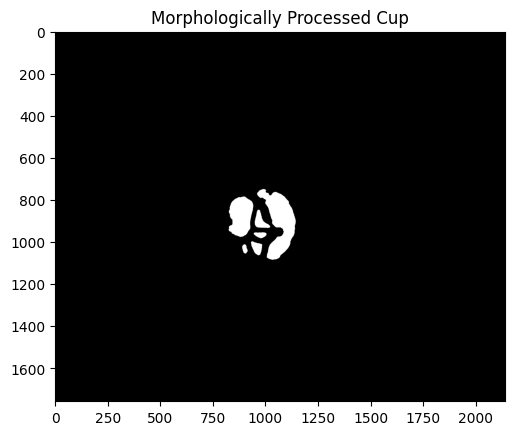

In [22]:
# Apply morphological opening and closing
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13, 13))
morph_open_disc = cv2.morphologyEx(thresh_disc, cv2.MORPH_OPEN, kernel)
morph_close_disc = cv2.morphologyEx(morph_open_disc, cv2.MORPH_CLOSE, kernel)

morph_open_cup = cv2.morphologyEx(thresh_cup, cv2.MORPH_OPEN, kernel)
morph_close_cup = cv2.morphologyEx(morph_open_cup, cv2.MORPH_CLOSE, kernel)

# Display results
plt.imshow(morph_close_disc, cmap='gray')
plt.title('Morphologically Processed Disc')
plt.show()

plt.imshow(morph_close_cup, cmap='gray')
plt.title('Morphologically Processed Cup')
plt.show()

Convex Hull

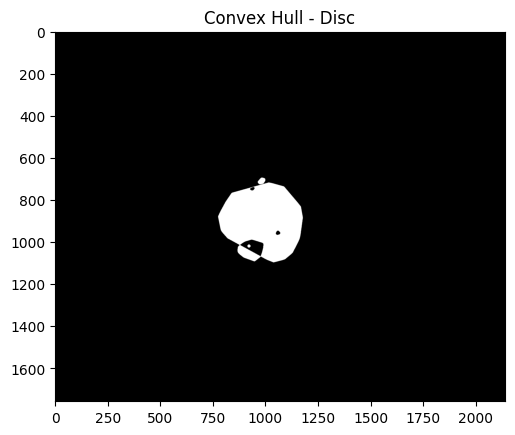

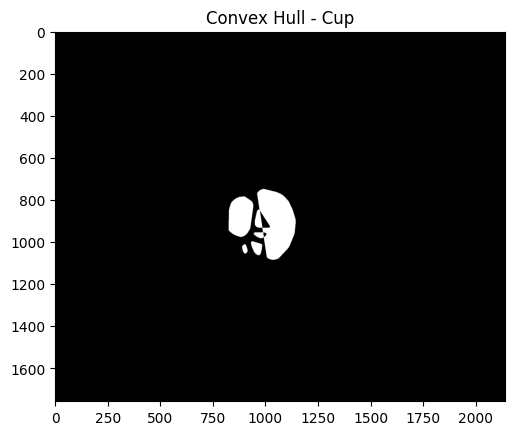

In [18]:
# Find contours
contours_disc, _ = cv2.findContours(morph_close_disc, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_cup, _ = cv2.findContours(morph_close_cup, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Apply convex hull to the contours
hull_disc = [cv2.convexHull(cnt) for cnt in contours_disc]
hull_cup = [cv2.convexHull(cnt) for cnt in contours_cup]

# Draw contours on a blank image
blank_disc = np.zeros_like(morph_close_disc)
blank_cup = np.zeros_like(morph_close_cup)
cv2.drawContours(blank_disc, hull_disc, -1, (255), -1)
cv2.drawContours(blank_cup, hull_cup, -1, (255), -1)

# Display convex hull results
plt.imshow(blank_disc, cmap='gray')
plt.title('Convex Hull - Disc')
plt.show()

plt.imshow(blank_cup, cmap='gray')
plt.title('Convex Hull - Cup')
plt.show()

Contour detection

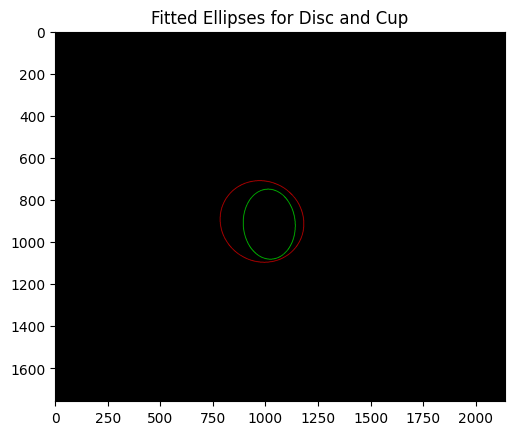

In [19]:
# Find largest contour (assuming the largest contour corresponds to the region of interest)
largest_disc = max(hull_disc, key=cv2.contourArea)
largest_cup = max(hull_cup, key=cv2.contourArea)

# Fit ellipse to the largest contours
ellipse_disc = cv2.fitEllipse(largest_disc)
ellipse_cup = cv2.fitEllipse(largest_cup)

# Draw ellipses on a blank image
result_image = np.zeros_like(img_np)
cv2.ellipse(result_image, ellipse_disc, (255, 0, 0), 2)  # Disc in red
cv2.ellipse(result_image, ellipse_cup, (0, 255, 0), 2)  # Cup in green

# Display result
plt.imshow(result_image)
plt.title('Fitted Ellipses for Disc and Cup')
plt.show()

Calculate CDR value

In [20]:
# Calculate major axes
major_axis_disc = max(ellipse_disc[1])
major_axis_cup = max(ellipse_cup[1])

# Compute CDR
cdr = major_axis_cup / major_axis_disc
print(f"Cup-to-Disc Ratio (CDR): {cdr}")

Cup-to-Disc Ratio (CDR): 0.8235400300892778
